In [1]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')

#import os
#os.getcwd()
#os.chdir(r'D:\New_Life\Notebooks

In [2]:
#Reading backtrajectories from excel file
path='C:/Users/kmmra/OneDrive/Desktop/Draft/plots and figures/data/Backtrajectories/'
df17 = pd.read_excel(path+'Made_1700mts_1900Hrs.xlsx',usecols='N:Q',skiprows=11)
lat17=np.array(df17['Lat'])
lon17=np.array(df17['Lon'])
lat17=lat17[:]
lon17=lon17[:]

#lon, lat = np.meshgrid(lon, lat)

In [3]:
path='C:/Users/kmmra/OneDrive/Desktop/Draft/plots and figures/data/Backtrajectories/'

df27 = pd.read_excel(path+'2700mts_1900Hrs.xlsx',skiprows=9,usecols='N:P')
lat27=np.array(df27['Lat'])
lon27=np.array(df27['Lon'])
lat27=lat27[:]
lon27=lon27[:]

In [4]:
lon27.min()

62.88

In [5]:
lon17.min()

44.775

In [6]:
file_path = 'D:/New_Life/Notebooks/play_ground/Data/'
npzfile=np.load(file_path+'merra2_aodana_aodinc_from_20180825_20180831.npz') # Open .npz file
sorted(npzfile.files)          #To visualize all arrays in the file
#aod=npzfile['aodana_mean']     #Load an array

['aodana',
 'aodana_mean',
 'aodinc',
 'aodinc_mean',
 'final_dates',
 'lats',
 'lons']

In [7]:
aodana_mean=npzfile['aodana_mean']
aodinc_mean=npzfile['aodinc_mean']
lats=npzfile['lats']
lons=npzfile['lons']

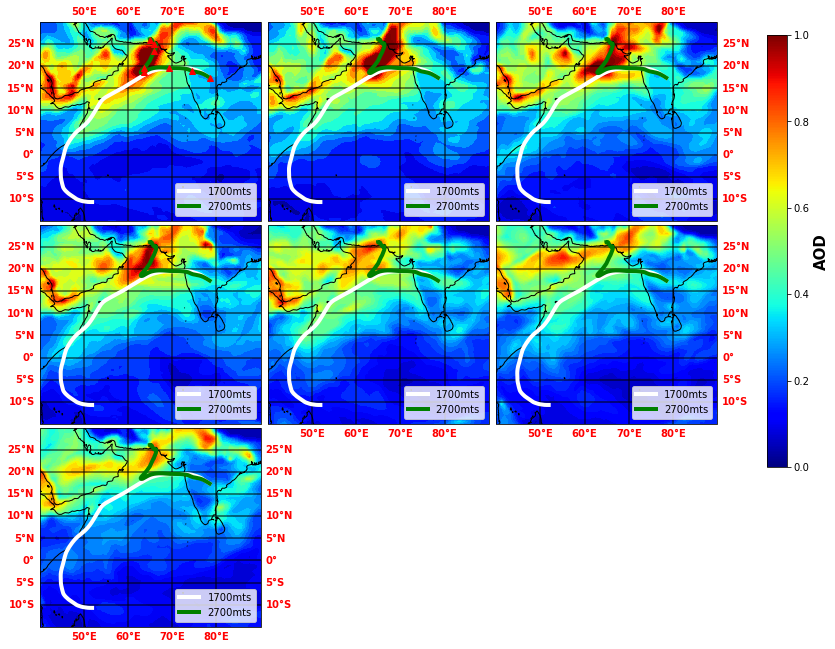

In [8]:

fig=plt.figure(figsize=(13.5,12))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)


def main():
    ax1 = plt.subplot(3,3, 1, projection=ccrs.PlateCarree())
    ax1.coastlines('50m')
    ax1.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax1.contourf(lons, lats, aodinc_mean[0,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet' )
    ax1.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax1.plot(9,10)
    ax1.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    i= [0,19,43,66,90,114,138,162]
    for i in i:
        ax1.plot(lon27[i],lat27[i],marker='^',color='r')
    ax1.legend(loc=4)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax2 = plt.subplot(3,3, 2, projection=ccrs.PlateCarree(),sharey=ax1)
    ax2.coastlines('50m')
    ax2.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax2.contourf(lons, lats, aodinc_mean[1,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax2.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax2.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax2.legend(loc=4)
    gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax3 = plt.subplot(3,3, 3, projection=ccrs.PlateCarree(),sharey=ax1)
    ax3.coastlines('50m')
    ax3.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax3.contourf(lons, lats, aodinc_mean[2,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax3.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax3.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax3.legend(loc=4)
    gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax4 = plt.subplot(3,3, 4, projection=ccrs.PlateCarree(),sharex=ax1)
    ax4.coastlines('50m')
    ax4.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax4.contourf(lons,lats, aodinc_mean[3,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax4.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax4.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax4.legend(loc=4)
    gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax5 = plt.subplot(3,3, 5, projection=ccrs.PlateCarree(),sharex=ax2)
    ax5.coastlines('50m')
    ax5.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax5.contourf(lons,lats, aodinc_mean[4,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax5.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax5.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax5.legend(loc=4)
    gl = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax6 = plt.subplot(3,3, 6, projection=ccrs.PlateCarree(),sharex=ax3)
    ax6.coastlines('50m')
    ax6.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax6.contourf(lons,lats, aodinc_mean[5,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax6.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax6.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax6.legend(loc=4)
    gl = ax6.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax7 = plt.subplot(3,3, 7, projection=ccrs.PlateCarree(),sharex=ax1)
    ax7.coastlines('50m')
    ax7.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax7.contourf(lons,lats, aodinc_mean[6,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet')
    ax7.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax7.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax7.legend(loc=4)
    gl = ax7.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}


    
if __name__ == '__main__':
    main()

    
#ax1 = plt.subplot(3,3, 8, projection=ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.85, 0.385, 0.02, 0.5]) #(w= >away from map, x= position up and down, y= width of cbar, z = height cb)
im =cbar_ax.pcolor(lons, lats, aodinc_mean[6,:,:] ,cmap='jet', vmin=0, vmax=1)#,60, vmin=0, vmax=1, cmap='jet')
#fig.colorbar(im, cax=cbar_ax)
#im.colorbar()
#plt.show()

a=fig.colorbar(im, ax = ax, orientation = 'vertical',cax = cbar_ax)

a.set_label(label='AOD',weight='bold', fontsize='15')
plt.savefig('try.jpg',bbox_inches='tight',dpi=1080)

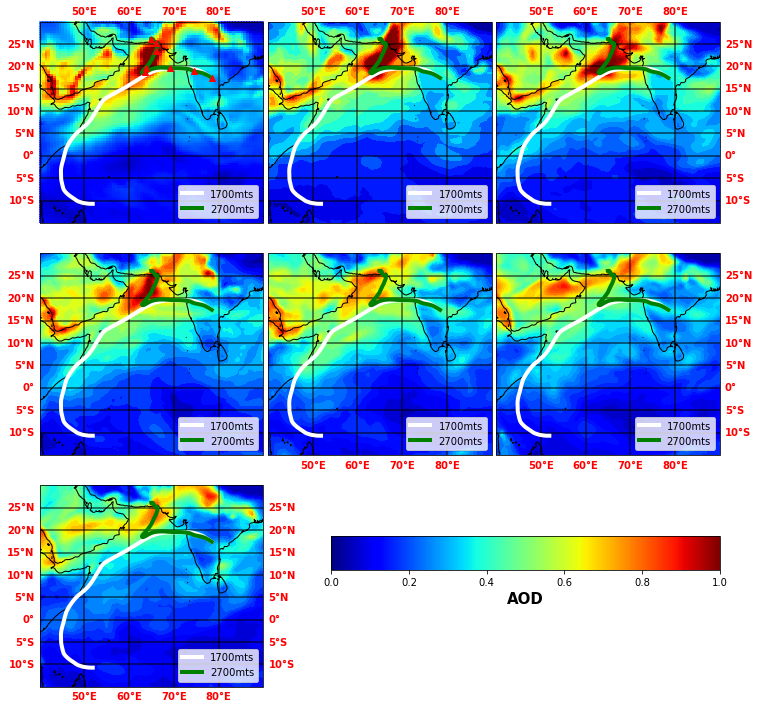

In [13]:

fig=plt.figure(figsize=(13.5,12))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)
# plt.subplots_adjust(bottom = 0.2) 


def main():
    ax1 = plt.subplot(3,3, 1, projection=ccrs.PlateCarree())
    ax1.coastlines('50m')
    ax1.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax1.pcolor(lons, lats, aodinc_mean[0,:,:],vmin=0,vmax=1,cmap='jet' ) #, transform=ccrs.PlateCarree(),60
    ax1.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax1.plot(9,10)
    ax1.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    i= [0,19,43,66,90,114,138,162]
    for i in i:
        ax1.plot(lon27[i],lat27[i],marker='^',color='r')
    ax1.legend(loc=4)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax2 = plt.subplot(3,3, 2, projection=ccrs.PlateCarree(),sharey=ax1)
    ax2.coastlines('50m')
    ax2.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax2.contourf(lons, lats, aodinc_mean[1,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax2.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax2.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax2.legend(loc=4)
    gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax3 = plt.subplot(3,3, 3, projection=ccrs.PlateCarree(),sharey=ax1)
    ax3.coastlines('50m')
    ax3.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax3.contourf(lons, lats, aodinc_mean[2,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax3.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax3.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax3.legend(loc=4)
    gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax4 = plt.subplot(3,3, 4, projection=ccrs.PlateCarree(),sharex=ax1)
    ax4.coastlines('50m')
    ax4.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax4.contourf(lons,lats, aodinc_mean[3,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax4.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax4.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax4.legend(loc=4)
    gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax5 = plt.subplot(3,3, 5, projection=ccrs.PlateCarree(),sharex=ax2)
    ax5.coastlines('50m')
    ax5.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax5.contourf(lons,lats, aodinc_mean[4,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax5.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax5.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax5.legend(loc=4)
    gl = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax6 = plt.subplot(3,3, 6, projection=ccrs.PlateCarree(),sharex=ax3)
    ax6.coastlines('50m')
    ax6.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax6.contourf(lons,lats, aodinc_mean[5,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax6.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax6.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax6.legend(loc=4)
    gl = ax6.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax7 = plt.subplot(3,3, 7, projection=ccrs.PlateCarree(),sharex=ax1)
    ax7.coastlines('50m')
    ax7.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax7.contourf(lons,lats, aodinc_mean[6,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet')
    ax7.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax7.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax7.legend(loc=4)
    gl = ax7.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}


    
if __name__ == '__main__':
    main()

    
# #ax1 = plt.subplot(3,3, 8, projection=ccrs.PlateCarree())
# fig.subplots_adjust(bottom=0.2)
# cbar_ax = fig.add_axes([0.85, 0.385, 0.02, 0.5]) #(w= >away from map, x= position up and down, y= width of cbar, z = height cb)
# im =cbar_ax.pcolor(lons, lats, aodinc_mean[6,:,:] ,cmap='jet', vmin=0, vmax=1)#,60, vmin=0, vmax=1, cmap='jet')
# #fig.colorbar(im, cax=cbar_ax)
# #im.colorbar()
# #plt.show()

# a=fig.colorbar(im, ax = ax, orientation = 'vertical',cax = cbar_ax)


#*********************************Best Colorbar *********************************
#ax7 = plt.subplot(3,3, 8, projection=ccrs.PlateCarree())#,sharex=ax1)
cbar_ax = plt.axes([0.4, 0.25, 0.4, 0.04]) #(w= increased so moved right,
                                            # x= 0.05 moved up,
                                            # y= 0.3 horizontal width of colorbar is increasing 
                                            # z= 0.075 vertical width of colorbar)
im =cbar_ax.pcolor(lons, lats, aodinc_mean[6,:,:] ,cmap='jet', vmin=0, vmax=1)
a=fig.colorbar(im,  orientation = 'horizontal',cax = cbar_ax)
a.set_label(label='AOD',weight='bold', fontsize='15')
#********************************************************************************
plt.savefig('try.jpg',bbox_inches='tight',dpi=1080)


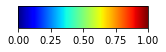

In [10]:
cbar_ax = plt.axes([0.4, 0.05, 0.3, 0.075]) 
im =cbar_ax.pcolor(lons, lats, aodinc_mean[6,:,:] ,cmap='jet', vmin=0, vmax=1)
a=fig.colorbar(im, ax = ax, orientation = 'horizontal',cax = cbar_ax)

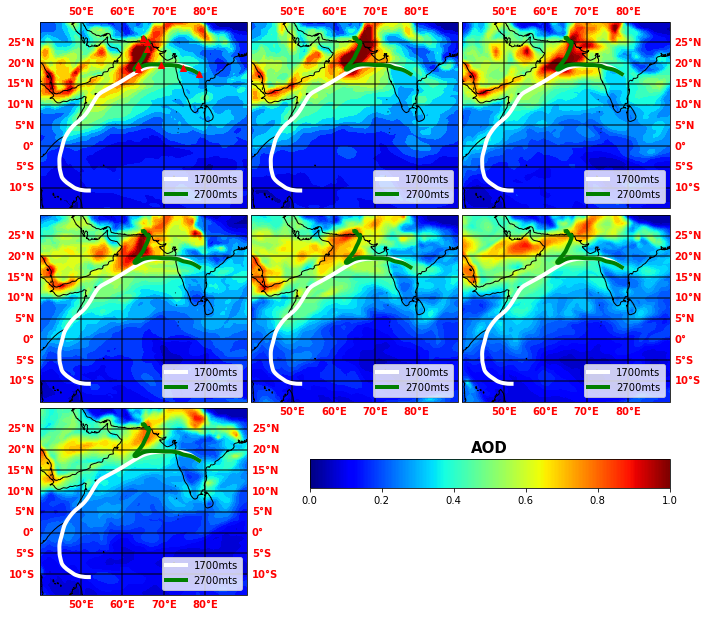

In [17]:

fig=plt.figure(figsize=(12.5,10))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)
# plt.subplots_adjust(bottom = 0.2) 


def main():
    ax1 = plt.subplot(3,3, 1, projection=ccrs.PlateCarree())
    ax1.coastlines('50m')
    ax1.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax1.contourf(lons, lats, aodinc_mean[0,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet' )
    ax1.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax1.plot(9,10)
    ax1.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    i= [0,19,43,66,90,114,138,162]
    for i in i:
        ax1.plot(lon27[i],lat27[i],marker='^',color='r')
    ax1.legend(loc=4)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax2 = plt.subplot(3,3, 2, projection=ccrs.PlateCarree(),sharey=ax1)
    ax2.coastlines('50m')
    ax2.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax2.contourf(lons, lats, aodinc_mean[1,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax2.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax2.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax2.legend(loc=4)
    gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax3 = plt.subplot(3,3, 3, projection=ccrs.PlateCarree(),sharey=ax1)
    ax3.coastlines('50m')
    ax3.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax3.contourf(lons, lats, aodinc_mean[2,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax3.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax3.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax3.legend(loc=4)
    gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = True # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax4 = plt.subplot(3,3, 4, projection=ccrs.PlateCarree(),sharex=ax1)
    ax4.coastlines('50m')
    ax4.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax4.contourf(lons,lats, aodinc_mean[3,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax4.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax4.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax4.legend(loc=4)
    gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = False # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax5 = plt.subplot(3,3, 5, projection=ccrs.PlateCarree(),sharex=ax2)
    ax5.coastlines('50m')
    ax5.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax5.contourf(lons,lats, aodinc_mean[4,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax5.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax5.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax5.legend(loc=4)
    gl = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax6 = plt.subplot(3,3, 6, projection=ccrs.PlateCarree(),sharex=ax3)
    ax6.coastlines('50m')
    ax6.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax6.contourf(lons,lats, aodinc_mean[5,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet',)
    ax6.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax6.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax6.legend(loc=4)
    gl = ax6.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = False
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    ax7 = plt.subplot(3,3, 7, projection=ccrs.PlateCarree(),sharex=ax1)
    ax7.coastlines('50m')
    ax7.set_extent([40,90,-15,30], ccrs.PlateCarree())
    ax7.contourf(lons,lats, aodinc_mean[6,:,:],60, transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='jet')
    ax7.plot(lon17,lat17,marker=None,color='w',linewidth=4,label='1700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax7.plot(lon27,lat27,marker=None,color='g',linewidth=4,label='2700mts',
        path_effects=[path_effects.Stroke(linewidth=0, foreground='black'),path_effects.Normal()])
    ax7.legend(loc=4)
   
#     ax7.grid(which='both')

#     xmajor_ticks = np.arange(40, 91, 10)
#     xminor_ticks = np.arange(40, 91, 5)

#     ymajor_ticks = np.arange(-15, 31, 10)
#     yminor_ticks = np.arange(-15, 31, 5)

#     ax7.set_xticks(xmajor_ticks)
#     ax7.set_xticks(xminor_ticks, minor=True)
#     ax7.set_yticks(ymajor_ticks)
#     ax7.set_yticks(yminor_ticks, minor=True)
    
    gl = ax7.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black', alpha=0.5, linestyle='-')
    gl.xlabels_top = False # False real
    gl.xlabels_bottom = True # Not exixting
    gl.ylabels_left = True
    gl.ylabels_right = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([40,50,60,70,80,90])
    gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 10,'color': 'red', 'weight': 'bold'}

    
if __name__ == '__main__':
    main()

    
# #ax1 = plt.subplot(3,3, 8, projection=ccrs.PlateCarree())
# fig.subplots_adjust(bottom=0.2)
# cbar_ax = fig.add_axes([0.85, 0.385, 0.02, 0.5]) #(w= >away from map, x= position up and down, y= width of cbar, z = height cb)
# im =cbar_ax.pcolor(lons, lats, aodinc_mean[6,:,:] ,cmap='jet', vmin=0, vmax=1)#,60, vmin=0, vmax=1, cmap='jet')
# #fig.colorbar(im, cax=cbar_ax)
# #im.colorbar()
# #plt.show()

# a=fig.colorbar(im, ax = ax, orientation = 'vertical',cax = cbar_ax)


#*********************************Best Colorbar *********************************
#ax7 = plt.subplot(3,3, 8, projection=ccrs.PlateCarree())#,sharex=ax1)

cbar_ax = plt.axes([0.4, 0.25, 0.4, 0.04]) #(w= increased so moved right,
                                            # x= 0.05 moved up,
                                            # y= 0.3 horizontal width of colorbar is increasing 
                                            # z= 0.075 vertical width of colorbar)
im =cbar_ax.pcolor(lons, lats, aodinc_mean[6,:,:] ,cmap='jet', vmin=0, vmax=1)
a=fig.colorbar(im,  orientation = 'horizontal',cax = cbar_ax)
a.set_label(label='AOD',weight='bold',labelpad=-65,fontsize='15')#
#********************************************************************************
plt.savefig('try.jpg',bbox_inches='tight',dpi=1080)
